In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data1 = pd.read_csv('/content/Test.csv')
data2 =pd.read_csv("/content/Train.csv")


In [ ]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
data2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
print(data1.shape)
print(data2.shape)

(5681, 11)
(8523, 12)


In [ ]:
data = pd.concat([data1, data2], ignore_index=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


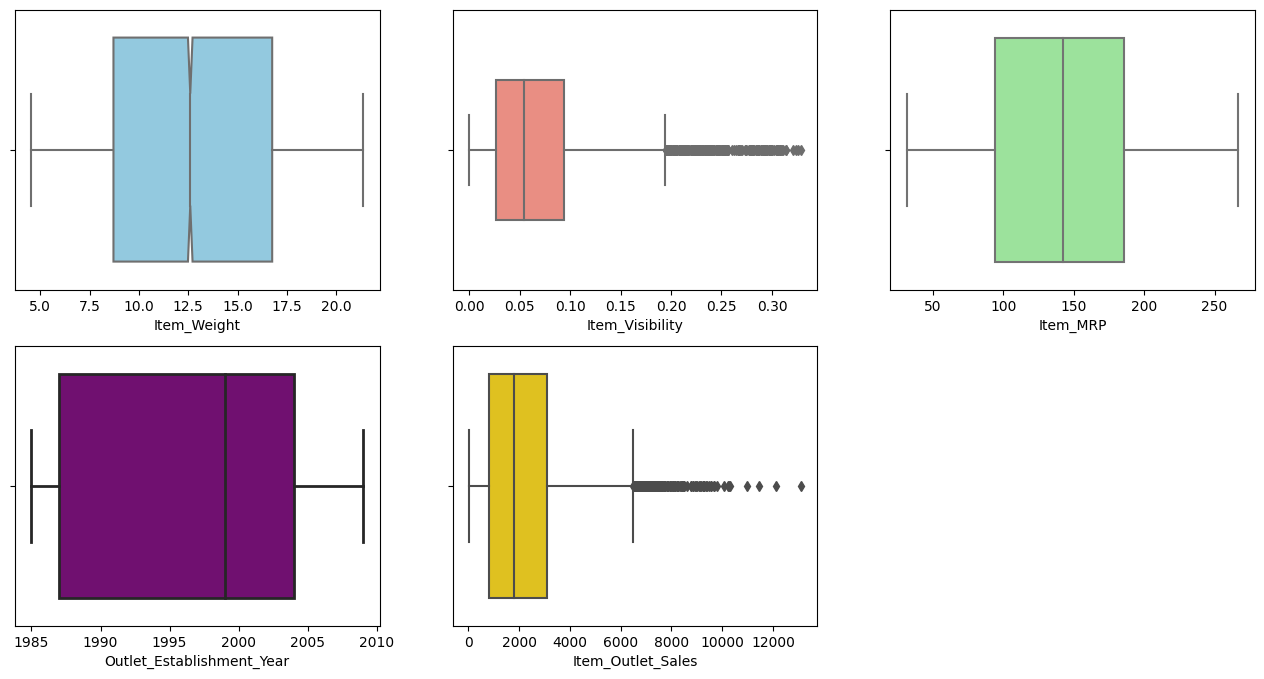

In [ ]:
plt.figure(figsize=(16, 8))


plt.subplot(2, 3, 1)
sns.boxplot(x='Item_Weight', data=data, notch=True, color='skyblue')

plt.subplot(2, 3, 2)
sns.boxplot(x='Item_Visibility', data=data, width=0.5, color='salmon')

plt.subplot(2, 3, 3)
sns.boxplot(x='Item_MRP', data=data, saturation=0.75, color='lightgreen')

plt.subplot(2, 3, 4)
sns.boxplot(x='Outlet_Establishment_Year', data=data, linewidth=2, color='purple')

plt.subplot(2, 3, 5)
sns.boxplot(x='Item_Outlet_Sales', data=data, orient='v', color='gold')

plt.show()

Upper limit:  0.19453961000000003
Lower limit:  -0.07346667400000001


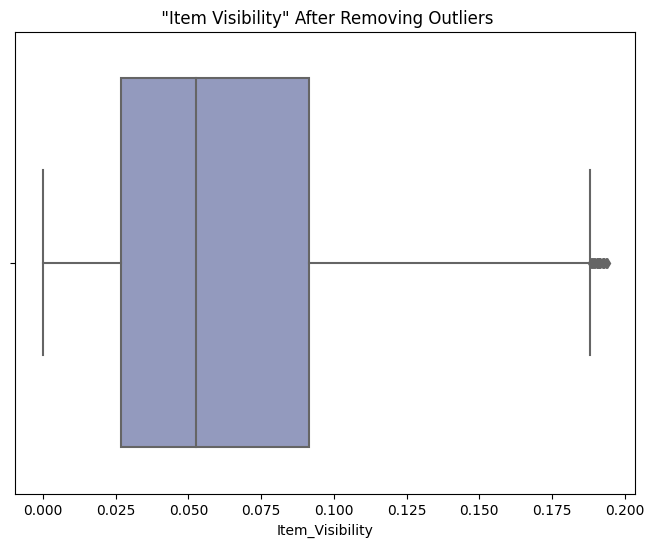

In [ ]:
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Visibility")
print("Upper limit: ", upper)
print("Lower limit: ", lower)
data = data[(data['Item_Visibility'] > lower) & (data['Item_Visibility'] < upper)]


plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Item_Visibility'], palette='BuPu')

plt.title(' "Item Visibility" After Removing Outliers')

plt.show()

Upper limit:  6497.7086500000005
Lower limit:  -2497.2493500000005


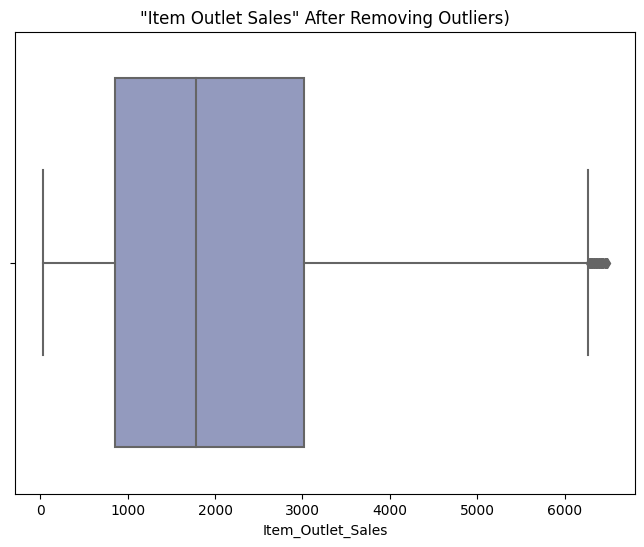

In [ ]:
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper limit: ", upper)
print("Lower limit: ", lower)
data = data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')

plt.title('"Item Outlet Sales" After Removing Outliers)')

plt.show()

In [ ]:
data['Outlet_Size'] = data.Outlet_Size.fillna(data.Outlet_Size.dropna().mode()[0])
data['Item_Weight'] = data.Item_Weight.fillna(data.Item_Weight.mean())

In [ ]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
data.corr()

<ipython-input-176-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.007956,0.026155,-0.009726,0.011091
Item_Visibility,-0.007956,1.000000,0.001582,-0.033550,-0.070335
Item_MRP,0.026155,0.001582,1.000000,0.027281,0.564568
Outlet_Establishment_Year,-0.009726,-0.033550,0.027281,1.000000,-0.009914
Item_Outlet_Sales,0.011091,-0.070335,0.564568,-0.009914,1.000000


<ipython-input-177-298a9b3d1152>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True);


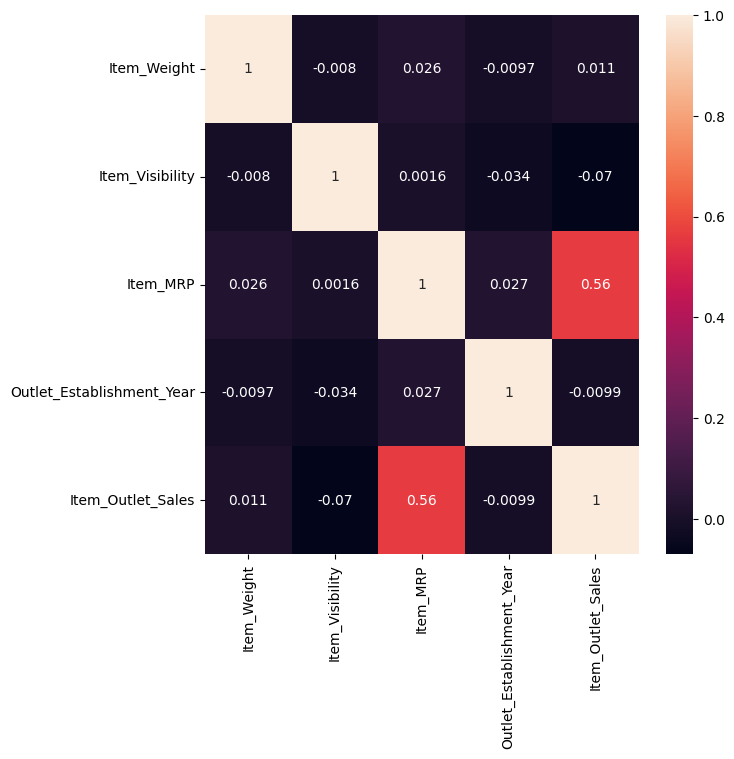

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True);

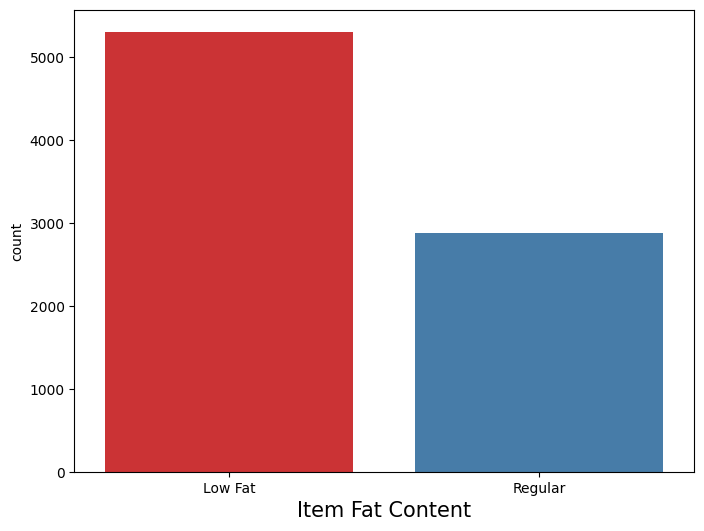

In [ ]:
fat_content_mapping = {'Low Fat': 'Low Fat', 'Regular': 'Regular', 'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}

data['Item_Fat_Content'] = data['Item_Fat_Content'].map(fat_content_mapping)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Item_Fat_Content', palette='Set1')
plt.xlabel('Item Fat Content', fontsize=15)

plt.show()

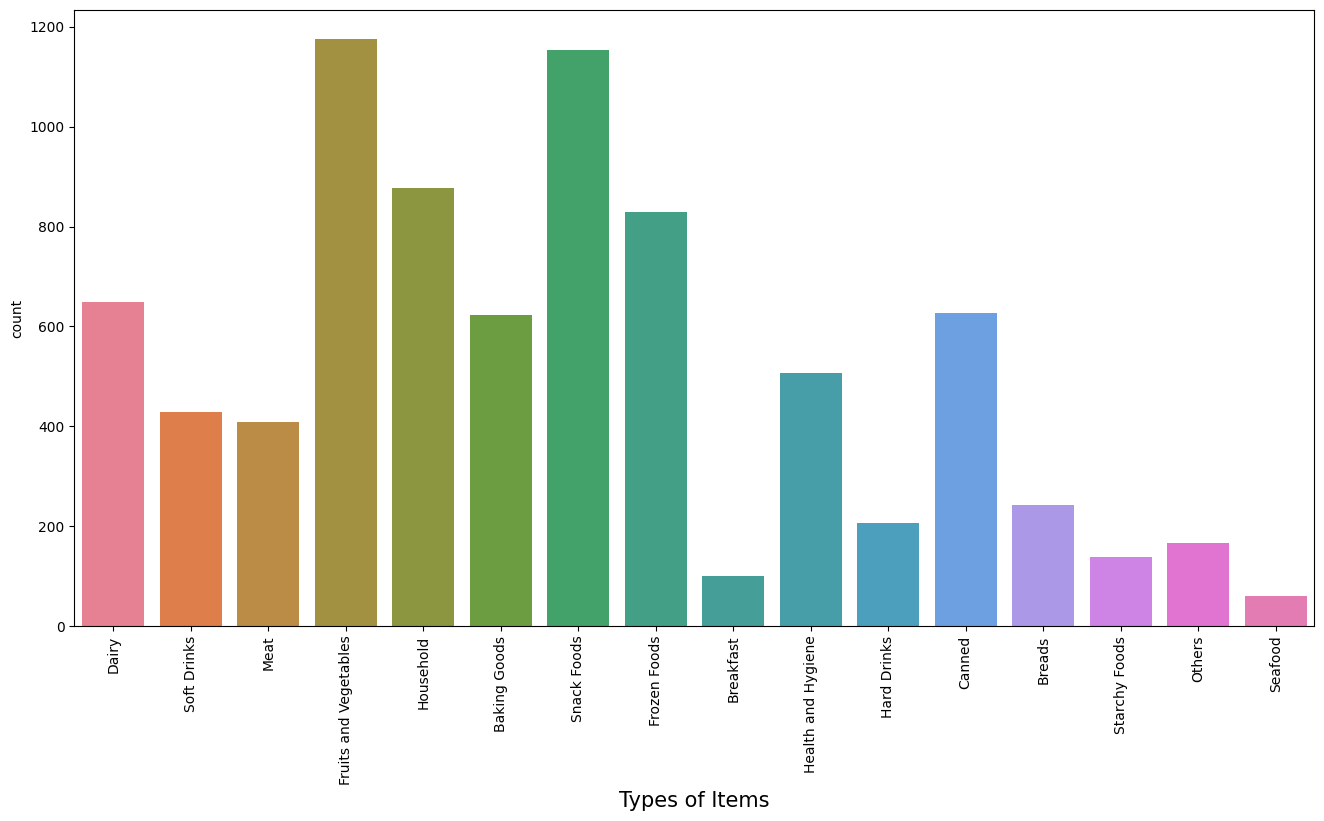

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data=data, x='Item_Type', palette='husl')
plt.xlabel('Types of Items', fontsize=15)
plt.xticks(rotation=90)
plt.show()

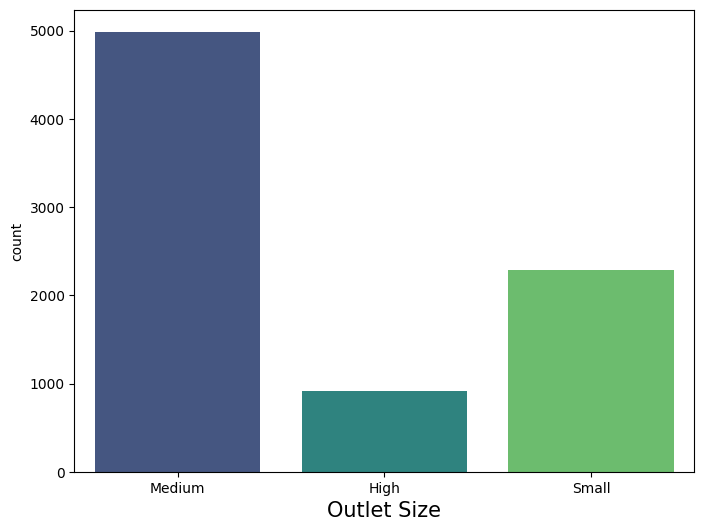

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Outlet_Size', palette='viridis')
plt.xlabel('Outlet Size', fontsize=15)
plt.show()

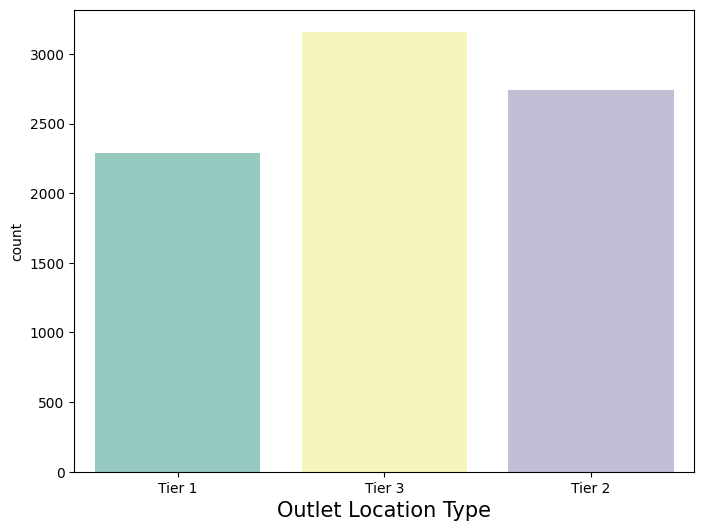

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Outlet_Location_Type', palette='Set3')
plt.xlabel('Outlet Location Type', fontsize=15)
plt.show()

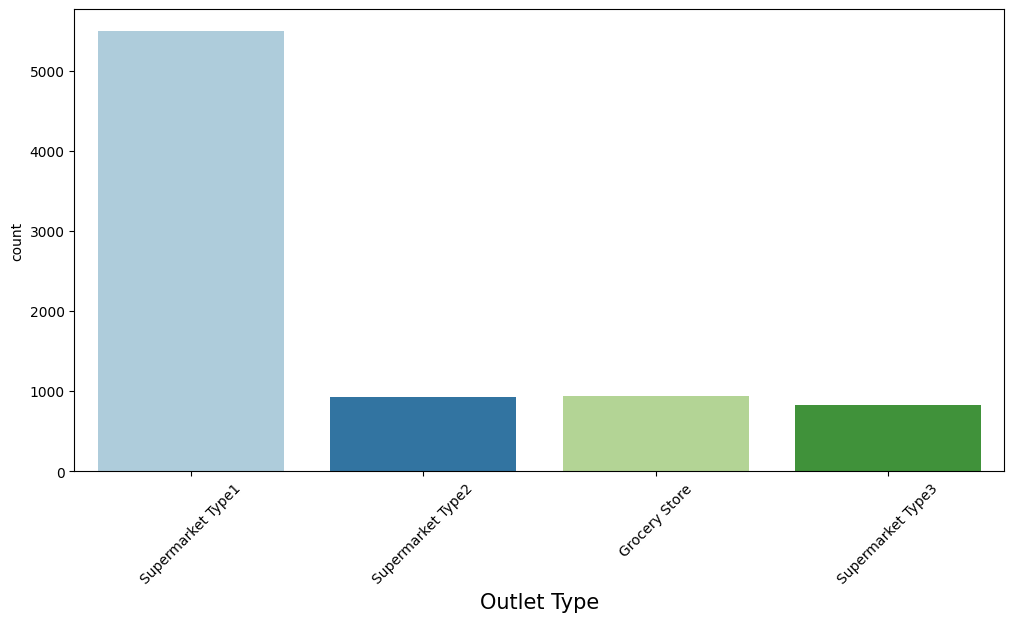

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Outlet_Type', palette='Paired')
plt.xlabel('Outlet Type', fontsize=15)
plt.xticks(rotation=45)
plt.show()

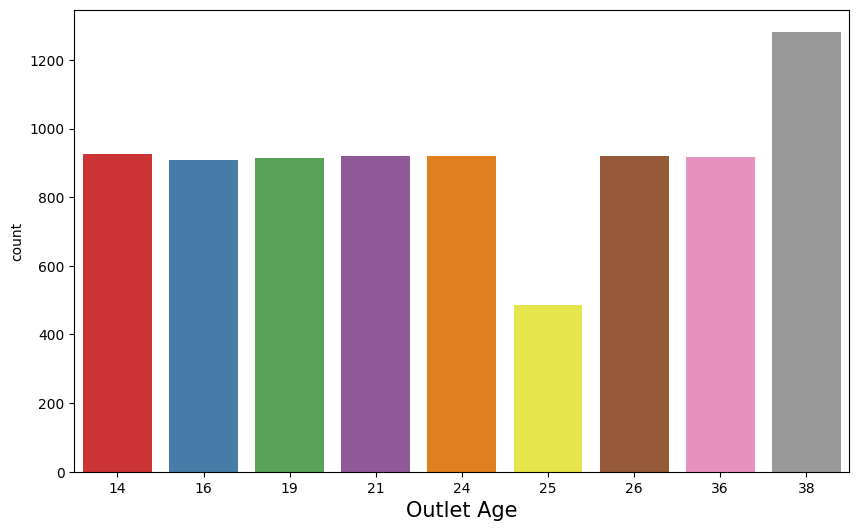

In [ ]:
data['Outlet_Age'] = 2023 - data['Outlet_Establishment_Year']

data.drop('Outlet_Establishment_Year', axis=1, inplace=True)

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Outlet_Age', palette='Set1')
plt.xlabel('Outlet Age', fontsize=15)

plt.show()

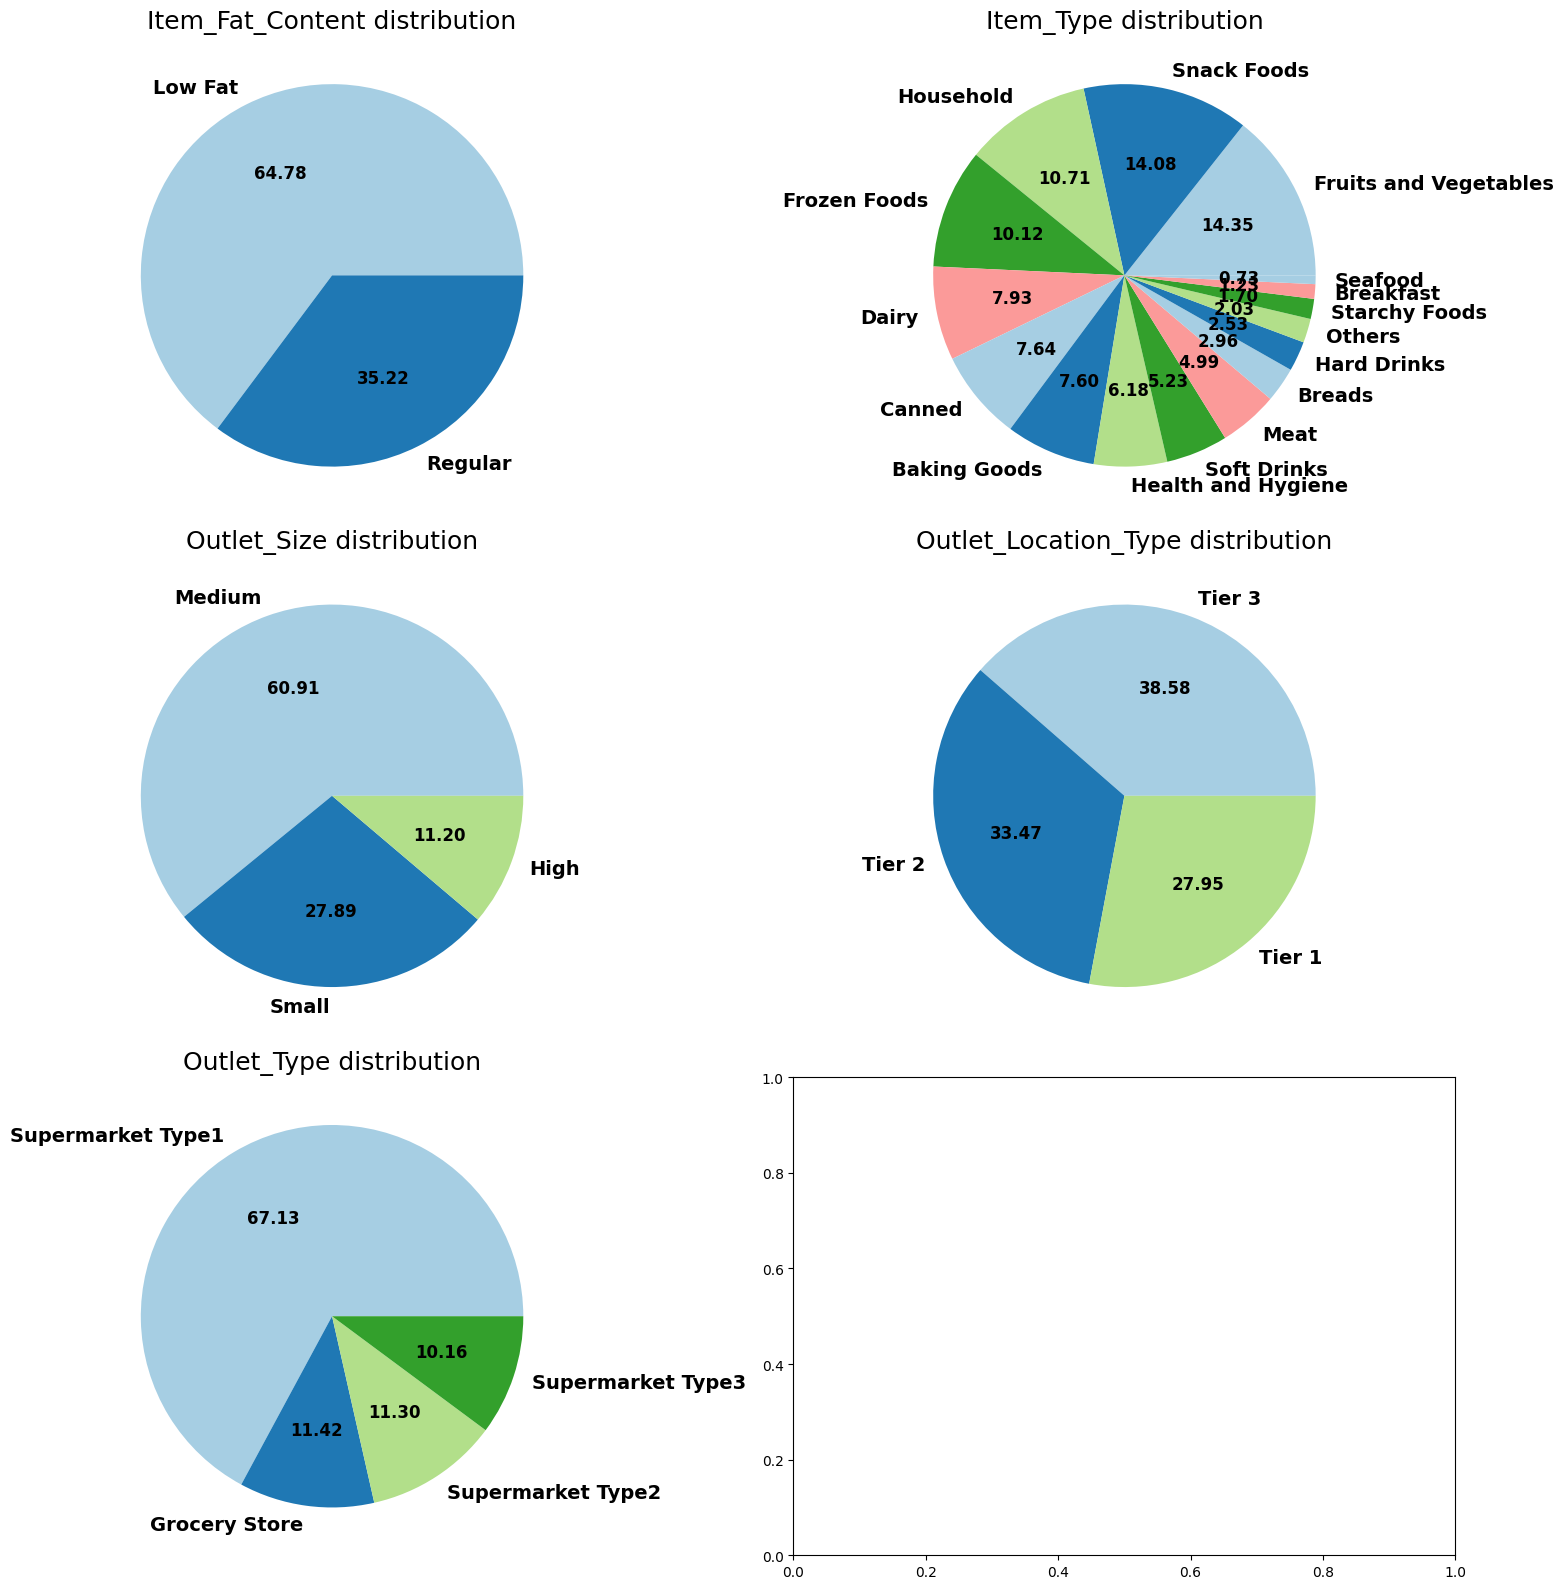

In [ ]:
categorical_cols_to_display = [ 'Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

colors = plt.cm.Paired(range(len(categorical_cols_to_display)))

_, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))

for index, col in enumerate(categorical_cols_to_display):
    r = index // 2
    c = index % 2
    counts = data[col].value_counts()


    wedges, texts, autotexts = ax[r][c].pie(counts, labels=counts.index, autopct="%.2f", colors=colors)

    for text in texts:
        text.set(size=14, weight="bold")
    for autotext in autotexts:
        autotext.set(size=12, weight="bold")

    ax[r][c].set_title(f'{col} distribution', fontsize=18)

plt.tight_layout()
plt.show()

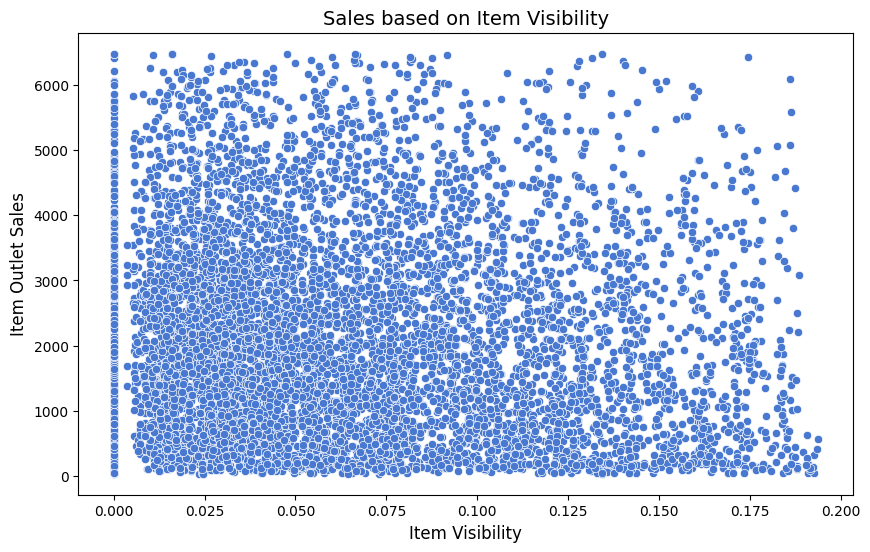

In [ ]:
plt.figure(figsize=(10, 6))


sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=data, marker='o', color='b')

plt.title('Sales based on Item Visibility', fontsize=14)
plt.xlabel('Item Visibility', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)

plt.show()

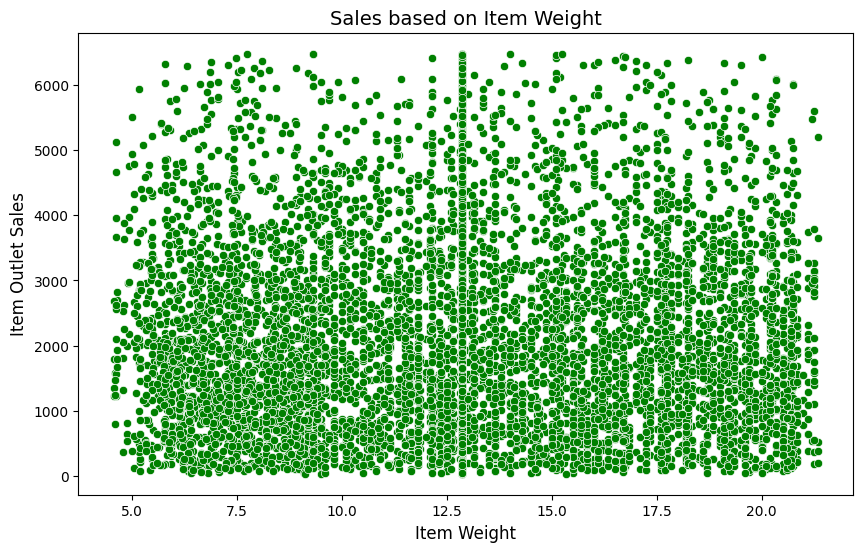

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=data, marker='o', color='green')

plt.title('Sales based on Item Weight', fontsize=14)
plt.xlabel('Item Weight', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)

plt.show()

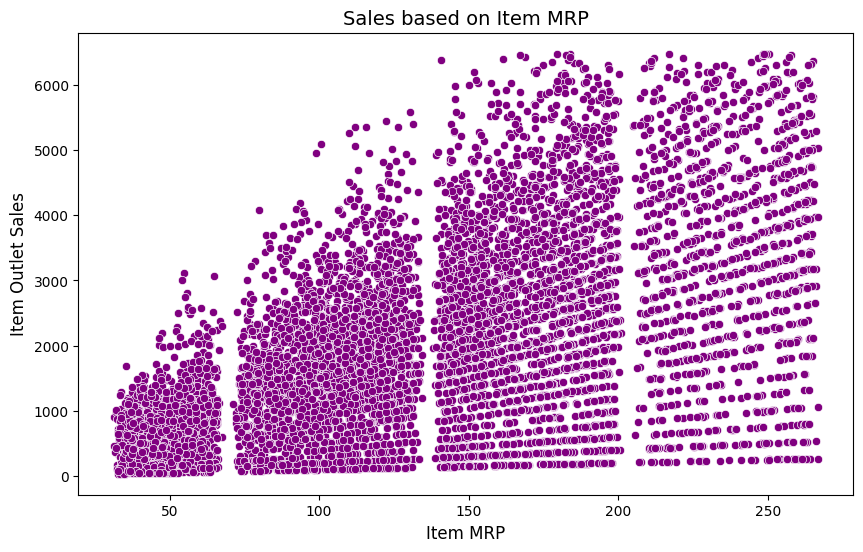

In [ ]:
plt.figure(figsize=(10, 6))


sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=data, marker='o', color='purple')
plt.title('Sales based on Item MRP', fontsize=14)
plt.xlabel('Item MRP', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)

plt.show()

In [ ]:
data = data.drop(columns = ['Item_Identifier' , 'Outlet_Identifier'],axis = 1)
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
5681,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,24
5682,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,14
5683,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,24
5684,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,25
5685,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,36


In [ ]:
data.shape

(8189, 10)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = ['Item_Fat_Content' , 'Outlet_Type' , 'Outlet_Size','Outlet_Location_Type'  ]

for i in label:
  data[i] = le.fit_transform(data[i])
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
5681,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,24
5682,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,14
5683,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700,24
5684,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,0,732.3800,25
5685,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052,36


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cols = ['Item_Type']


OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(data[cols])).astype('int64')

data_oh.columns = OH_encoder.get_feature_names_out(cols)

data_oh.index = data.index


new_data = pd.concat([data, data_oh], axis=1)
new_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
5681,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,24,...,0,0,0,0,0,0,0,0,0,0
5682,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,14,...,0,0,0,0,0,0,0,0,1,0
5683,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700,24,...,0,0,0,0,1,0,0,0,0,0
5684,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,0,732.3800,25,...,1,0,0,0,0,0,0,0,0,0
5685,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052,36,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
new_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
5681,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,24,...,0,0,0,0,0,0,0,0,0,0
5682,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,14,...,0,0,0,0,0,0,0,0,1,0
5683,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700,24,...,0,0,0,0,1,0,0,0,0,0
5684,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,0,732.3800,25,...,1,0,0,0,0,0,0,0,0,0
5685,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052,36,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
data = new_data.drop(columns = ['Item_Type'],axis=1)
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
5681,9.30,0,0.016047,249.8092,1,0,1,3735.1380,24,0,...,0,0,0,0,0,0,0,0,0,0
5682,5.92,1,0.019278,48.2692,1,2,2,443.4228,14,0,...,0,0,0,0,0,0,0,0,1,0
5683,17.50,0,0.016760,141.6180,1,0,1,2097.2700,24,0,...,0,0,0,0,1,0,0,0,0,0
5684,19.20,1,0.000000,182.0950,1,2,0,732.3800,25,0,...,1,0,0,0,0,0,0,0,0,0
5685,8.93,0,0.000000,53.8614,0,2,1,994.7052,36,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
x = data.drop(columns = ['Item_Outlet_Sales'],axis = 1)
y = data['Item_Outlet_Sales']

In [ ]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
5681,9.30,0,0.016047,249.8092,1,0,1,24,0,0,...,0,0,0,0,0,0,0,0,0,0
5682,5.92,1,0.019278,48.2692,1,2,2,14,0,0,...,0,0,0,0,0,0,0,0,1,0
5683,17.50,0,0.016760,141.6180,1,0,1,24,0,0,...,0,0,0,0,1,0,0,0,0,0
5684,19.20,1,0.000000,182.0950,1,2,0,25,0,0,...,1,0,0,0,0,0,0,0,0,0
5685,8.93,0,0.000000,53.8614,0,2,1,36,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y.head()

5681    3735.1380
5682     443.4228
5683    2097.2700
5684     732.3800
5685     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score as CVS
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

Linear regression

In [ ]:
model = LinearRegression()
model.fit(x_train , y_train)

lr_predict = model.predict(x_test)


mae_score = mean_absolute_error(y_test , lr_predict)
mse_score = mean_squared_error(y_test , lr_predict)
r2score = r2_score(y_test , lr_predict)
print(f" Mean Absolute Error: {mae_score}\n")
print(f" Squared Mean Squared Error: {np.sqrt(mse_score)}\n")
print(f" R^2 Score: {r2score}\n")

mae_score_lr = mae_score
r2score_lr = r2score

CVS(LinearRegression(),x,y)

 Mean Absolute Error: 810.6912413247968

 Squared Mean Squared Error: 1056.7097810954815

 R^2 Score: 0.4858247533653971



array([0.49177223, 0.48823217, 0.46324149, 0.4757324 , 0.4881606 ])

Lasso regression

In [ ]:
model = Lasso()
model.fit(x_train , y_train)

lasso_prediction = model.predict(x_test)

mae_score = mean_absolute_error(y_test , lasso_prediction)
mse_score = mean_squared_error(y_test , lasso_prediction)
r2_score = r2_score(y_test , lasso_prediction)
print(f" Mean Absolute Error: {mae_score}\n")
print(f" Squared Mean Squared Error: {np.sqrt(mse_score)}\n")
print(f" R^2 Score: {r2score}\n")

mae_score_lasso = mae_score
r2score_ls = r2score

CVS(Lasso(),x,y)

 Mean Absolute Error: 809.8691357745614

 Squared Mean Squared Error: 1055.4416287205365

 R^2 Score: 0.4858247533653971



array([0.49181966, 0.48936474, 0.46324606, 0.47776157, 0.48896597])

Decision tree

In [ ]:
model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
model.fit(x_train, y_train)

tree_predict = model.predict(x_test)


DR_MAE = mean_absolute_error(y_test, tree_predict)
DR_MSE = mean_squared_error(y_test, tree_predict)

print(f" Mean Absolute Error: {DR_MAE}\n")
print(f" Mean Squared Error: {DR_MSE}\n")

DR_MAE = mae_score

r2score_dt = r2score

CVS(DecisionTreeRegressor(),x,y)

 Mean Absolute Error: 705.1656568474025

 Mean Squared Error: 920897.1807455926



array([0.16997617, 0.15168356, 0.13032148, 0.12543136, 0.15256286])

Random forest

In [ ]:
model = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)
model.fit(x_train, y_train)


forest_predict = model.predict(x_test)


RFR_MAE = mean_absolute_error(y_test, forest_predict)
RFR_MSE = mean_squared_error(y_test, forest_predict)

print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")

RFR_MAE = mae_score

r2score_rf = r2score

CVS(RandomForestRegressor(),x, y)

 Mean Absolute Error: 702.7709208230287

 Mean Squared Error: 904559.9567382074



array([0.52690062, 0.51812328, 0.49384296, 0.51850786, 0.53102813])

XGB regressor

In [ ]:
model = XGBRegressor()
model.fit(x_train, y_train)


y_predict = model.predict(x_test)


XG_MAE = mean_absolute_error(y_test, y_predict)
XG_MSE = mean_squared_error(y_test, y_predict)

print(f" Mean Absolute Error: {XG_MAE}\n")
print(f" Mean Squared Error: {XG_MSE}\n")

XG_MAE = mae_score

r2score_xg = r2score

CVS(XGBRegressor(),x, y)

 Mean Absolute Error: 752.9655314816187

 Mean Squared Error: 1080861.68322342



array([0.4886449 , 0.48711807, 0.45622046, 0.49348112, 0.50227087])